In [64]:
#problem statement:-

In [65]:
# Use decision trees to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" 
# and others are "Good"

# Data Description :

# Undergrad : person is under graduated or 
# not
# Marital.Status : marital status of a person

# Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

# Work Experience : Work experience of an individual person

# Urban : Whether that person belongs to urban area or not



In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [67]:
df=pd.read_csv("/content/Fraud_check.csv")

In [68]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [69]:
df.shape

(600, 6)

In [70]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [71]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [72]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [73]:
from sklearn.preprocessing import LabelEncoder 

In [74]:

col=["Undergrad","Marital.Status","Urban"]
encoders = {column: LabelEncoder() for column in col}
for column in col:
  df[column] = encoders[column].fit_transform(df[column])

In [75]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


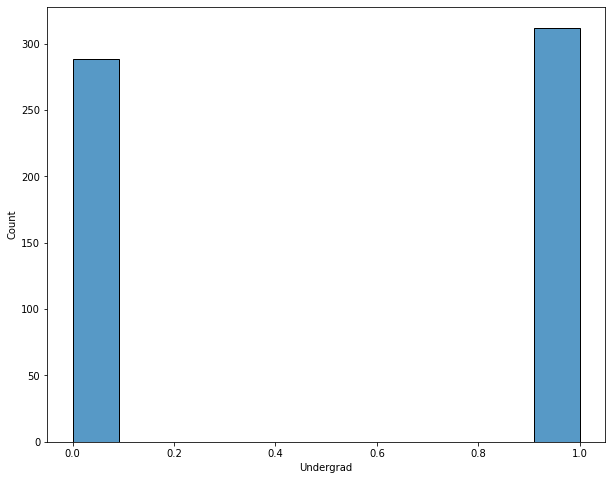

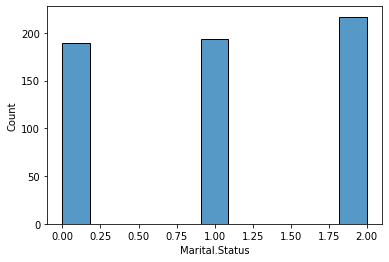

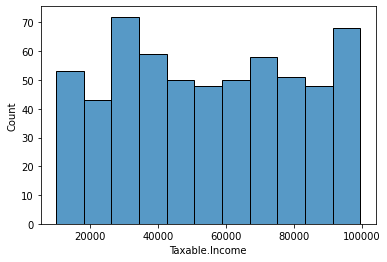

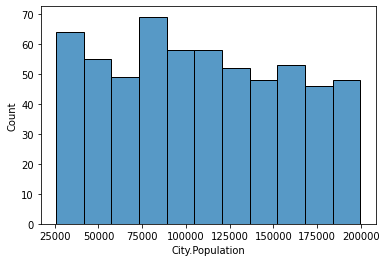

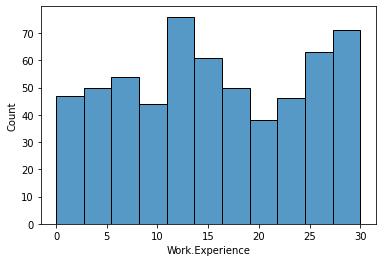

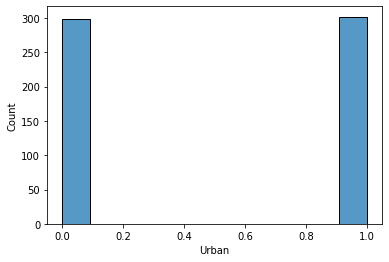

In [76]:
plt.figure(figsize=(10,8))
for col in df:
  sns.histplot(x=df[col],data=df)
  plt.show()

In [77]:
x=df.drop("Taxable.Income",axis=1)
y=df["Taxable.Income"]

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [80]:
#using CART for regression method
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)


DecisionTreeRegressor()

In [88]:
model.score(x_test,y_test)

-0.7911660742206121